In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

0.8


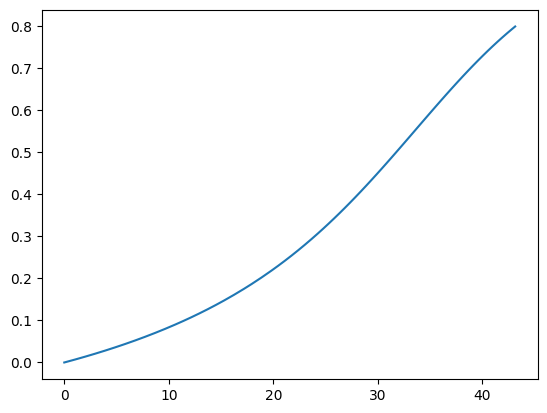

In [27]:
def ode(t, y):
    f = y*0

    X = y[0]

    R = 8.314
    T_0 = 450
    F_A0 = 20
    E = 31.4e3

    T = T_0 + 500 * X
    k = 0.133 * np.exp(E / R * (1/450 - 1/T))

    f[0] = k * (1 - X) / (1 + X) * T_0 / T / F_A0
    
    return f

ode_kwargs = {
    'method': 'Radau',
    'atol': 1e-8,
    'rtol': 1e-8,
}

sol = solve_ivp(ode, [0, 43.13710530642165], [0], **ode_kwargs)
print(sol.y[0][-1])
plt.plot(sol.t, sol.y[0], label=r"$$")
# plt.xlabel(r"$t$ (min)")
# plt.xlabel(r"$N$ (mol)")
# plt.legend()

850.0


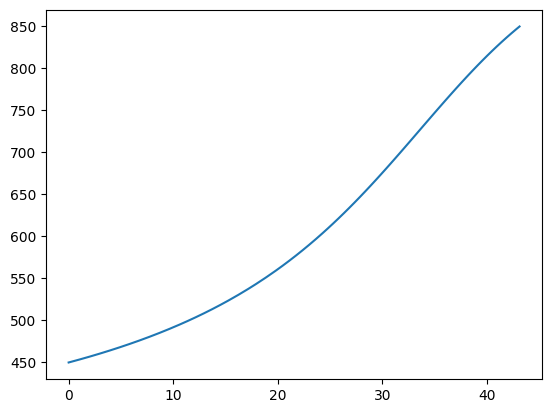

In [65]:
plt.plot(sol.t, 450 + 500 * sol.y[0])
print((450 + 500 * sol.y[0])[-1])

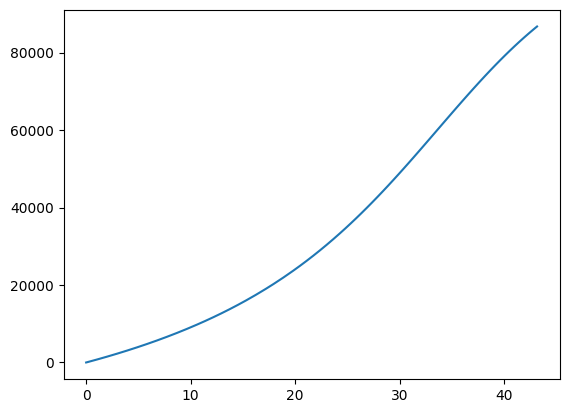

In [30]:
def Q(X, T):
    F_A0 = 10 * 20 / 0.08206 / 450
    return F_A0 * (40000 * (T - 450) + 20000 * X)

X = sol.y[0]
T = 450 + 500 * sol.y[0]
plt.plot(sol.t, Q(X, T)/1000)

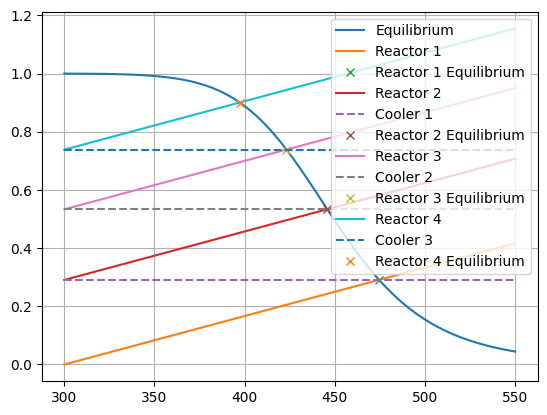

In [107]:
K_0 = 500000
H = -30000 * 4.184
X = lambda K: np.sqrt(K) / (1 + np.sqrt(K))
K = lambda T: K_0 * np.exp(H/8.314 * (1/(50+273.15) - 1/T))
T = lambda X: 600 * X + 300.15
X_T = lambda T: (T - 300.15) / 600

T_ran = np.linspace(300, 550, 100)

plt.plot(T_ran, X(K(T_ran)), label="Equilibrium")
plt.plot(T_ran, X_T(T_ran), label="Reactor 1")

def sys1(x):
    f = x*0

    f[0] = T(x[1]) - x[0]
    f[1] = X(K(x[0])) - x[1]

    return f

point_1 = fsolve(sys1, [300, 0.3])

plt.plot(point_1[0], point_1[1], 'x', label="Reactor 1 Equilibrium")
plt.grid(visible=True, which='both', axis='both')

plt.plot(T_ran, X_T(T_ran)+point_1[1], label="Reactor 2")
plt.plot(T_ran, np.ones(len(T_ran))*point_1[1], '--', label="Cooler 1")

def sys2(x):
    f = x*0

    f[0] = T(x[1] - point_1[1]) - x[0]
    f[1] = X(K(x[0])) - x[1]

    return f

point_2 = fsolve(sys2, [point_1[0], 0.5])
plt.plot(point_2[0], point_2[1], 'x', label="Reactor 2 Equilibrium")

plt.plot(T_ran, X_T(T_ran)+point_2[1], label="Reactor 3")
plt.plot(T_ran, np.ones(len(T_ran))*point_2[1], '--', label="Cooler 2")

def sys3(x):
    f = x*0

    f[0] = T(x[1] - point_2[1]) - x[0]
    f[1] = X(K(x[0])) - x[1]

    return f

point_3 = fsolve(sys3, [point_2[0], 0.5])
plt.plot(point_3[0], point_3[1], 'x', label="Reactor 3 Equilibrium")

plt.plot(T_ran, X_T(T_ran)+point_3[1], label="Reactor 4")
plt.plot(T_ran, np.ones(len(T_ran))*point_3[1], '--', label="Cooler 3")

def sys4(x):
    f = x*0

    f[0] = T(x[1] - point_3[1]) - x[0]
    f[1] = X(K(x[0])) - x[1]

    return f

point_4 = fsolve(sys4, [point_3[0], 0.5])
plt.plot(point_4[0], point_4[1], 'x', label="Reactor 4 Equilibrium")

# plt.plot(T_ran, X_T(T_ran)+point_3[1])
# plt.plot(T_ran, np.ones(len(T_ran))*point_4[1], '--')

plt.legend()

(310.50110146641964, 377.4313357758544, 418.4300985153134, 0.5396504925765649)

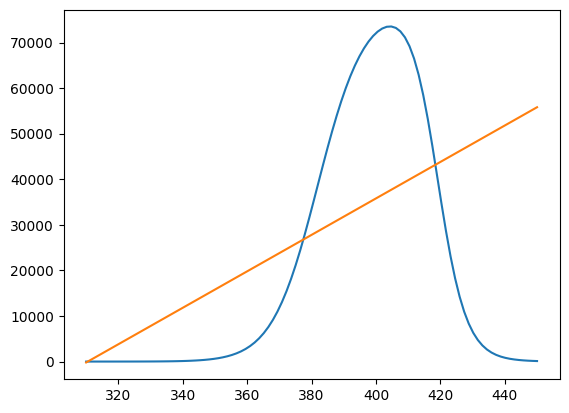

In [26]:
k = lambda T: np.exp(20000 * (1/400 - 1/T))
H = -80000 * 4.184
K_c = lambda T: 100 * np.exp(H/8.314 * (1/400 - 1/T))
tau = 10
X = lambda T: tau * k(T) / (1 + tau * k(T) * (1 + K_c(T)**-1))

G = lambda T: 80000 * X(T)
R = lambda T: 400 * (T - 310.5)

T_ran = np.linspace(310, 450, 100)

plt.plot(T_ran, G(T_ran))
plt.plot(T_ran, R(T_ran))

# plt.plot(T_ran, k(T_ran))
# plt.plot(T_ran, K_c(T_ran))

point_1 = fsolve(lambda T: G(T) - R(T), [310])
point_2 = fsolve(lambda T: G(T) - R(T), [370])
point_3 = fsolve(lambda T: G(T) - R(T), [420])

point_1[0], point_2[0], point_3[0], X(point_3[0])